# Algoritmos Genéticos con Python

PyGAD - https://github.com/ahmedfgad/GeneticAlgorithmPython

## Esquema básico

Básicamente tenemos que:
- definir la función de fitness
- crear una instancia del algoritmo con los parámetros adecuados
- ejecutar el algoritmo
- tratar los resultados

In [3]:
```python
# Definimos la función de fitnet que tendrá 3 parámetros
# ga_instance - instancia del algoritmo
# solution - individuo (cromosoma)
# solution_idx - xxxx
def fitness_func(ga_instance, solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

# Creamos una instancia del algoritmo
# Le pasamos diferentes parámetros para configurar el algoritmo
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func)

# Ejecutamos el algoritmo
ga_instance.run()

# Trabajamos con los resultado

# Pintamos la evolución de la función fitness
ga_instance.plot_fitness()

# Nos quedamos con la mejor solución
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
```

SyntaxError: invalid syntax (3168737498.py, line 1)

## Optimización de Funciones

## Entrenamiento de una red neuronal

C:\Users\acca3\miniconda3\Lib\site-packages\pygad\pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
C:\Users\acca3\miniconda3\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called

Generation = 1
Fitness    = 0.7256182248859878
Change     = 0.7256182248859878
Generation = 2
Fitness    = 0.9904998678082497
Change     = 0.2648816429222619
Generation = 3
Fitness    = 0.9904998678082497
Change     = 0.0
Generation = 4
Fitness    = 0.9904998678082497
Change     = 0.0
Generation = 5
Fitness    = 5.232174630688855
Change     = 4.241674762880605
Generation = 6
Fitness    = 5.232174630688855
Change     = 0.0
Generation = 7
Fitness    = 5.232174630688855
Change     = 0.0
Generation = 8
Fitness    = 5.232174630688855
Change     = 0.0
Generation = 9
Fitness    = 5.232174630688855
Change     = 0.0
Generation = 10
Fitness    = 5.232174630688855
Change     = 0.0
Generation = 11
Fitness    = 5.232174630688855
Change     = 0.0
Generation = 12
Fitness    = 5.232174630688855
Change     = 0.0
Generation = 13
Fitness    = 5.232174630688855
Change     = 0.0
Generation = 14
Fitness    = 5.232174630688855
Change     = 0.0
Generation = 15
Fitness    = 5.232174630688855
Change     = 0.0
G

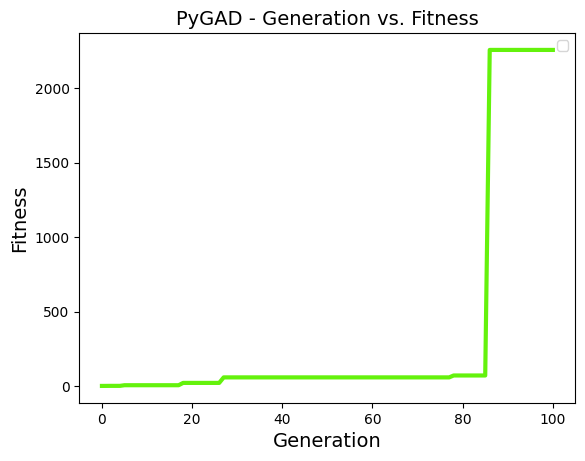

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Parameters of the best solution : [ 2.89643654 -1.49408089  2.67473158 -1.41444452 -2.19828395 -0.62895168]
Fitness value of the best solution = 2255.7801991911174
Index of the best solution : 0
Predicted output based on the best solution : 44.00044230560236
Best fitness value reached after 86 generations.


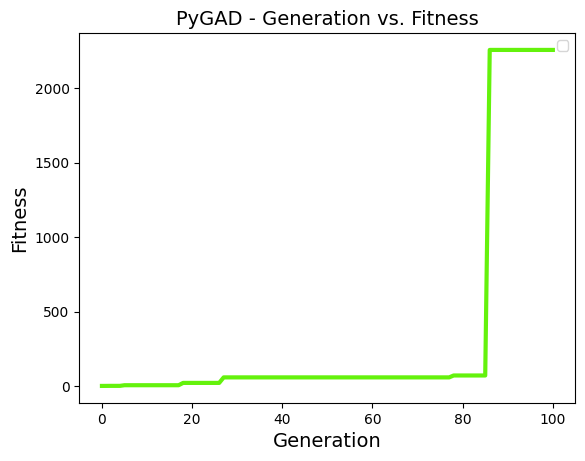

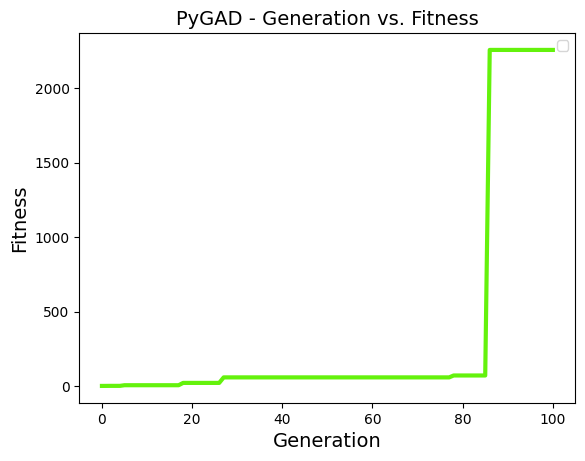

In [1]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

def fitness_func(ga_instance, solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print(f"Predicted output based on the best solution : {prediction}")

if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()